#Settings

In [6]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# change working directory
%cd /content/gdrive/My Drive/UEA-IA/iris/

/content/gdrive/My Drive/UEA-IA/iris


#Exploration

In [8]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

In [16]:
# Load dataset
columns = ['sepal_length',	'sepal_width',	'petal_length',	'petal_width',	'species']
df_iris = pd.read_csv('./dataset/iris.csv', names=columns)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Dataset information

In [22]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
# Categories
df_iris.species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [21]:
# Null values
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Observações**:

*   O *dataset* possui 5 atributos, sendo o atributo alvo a *species* 
*   *species* possui 3 categorias divididas igualmente entre 150 instâncias: *setosa*, *virginica* e *versicolor*
*   *Iris dataset* não possui valores faltantes



##Visualization

[]

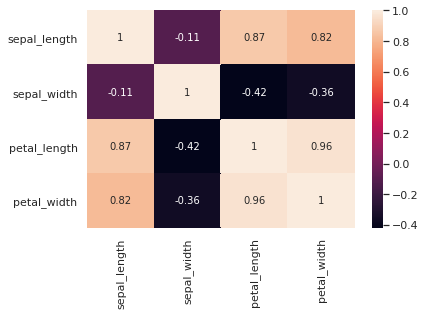

In [32]:
# Correlation between variables
sns.heatmap(df_iris.corr(),annot=True)
plt.plot()

In [40]:
!git config --global user.email "mmmt.eng@uea.edu.br"
!git config --global user.name "Matheus Matos"

In [42]:
!git commit -am "Configuração do notebook e inicialização do data"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Iris.ipynb

nothing added to commit but untracked files present (use "git add" to track)


#Results